In [13]:
!ls -l './img_adj.zip'

-rw-r--r-- 1 lab11 multi 51834876 Apr 16 17:13 ./img_adj.zip


In [14]:
!unzip ./img_adj.zip

Archive:  ./img_adj.zip
   creating: img_adj/
  inflating: img_adj/85.jpg          
   creating: img_adj/img/
   creating: img_adj/img/0/
  inflating: img_adj/img/0/001.jpg   
  inflating: img_adj/img/0/002.jpg   
  inflating: img_adj/img/0/003.jpg   
  inflating: img_adj/img/0/004.jpg   
  inflating: img_adj/img/0/005.jpg   
  inflating: img_adj/img/0/006.jpg   
  inflating: img_adj/img/0/007.jpg   
  inflating: img_adj/img/0/008.jpg   
  inflating: img_adj/img/0/009.jpg   
  inflating: img_adj/img/0/010.jpg   
  inflating: img_adj/img/0/011.jpg   
  inflating: img_adj/img/0/012.jpg   
  inflating: img_adj/img/0/013.jpg   
  inflating: img_adj/img/0/014.jpg   
  inflating: img_adj/img/0/015.jpg   
 extracting: img_adj/img/0/016.jpg   
 extracting: img_adj/img/0/017.jpg   
 extracting: img_adj/img/0/018.jpg   
 extracting: img_adj/img/0/019.jpg   
 extracting: img_adj/img/0/020.jpg   
  inflating: img_adj/img/0/021.jpg   
  inflating: img_adj/img/0/022.jpg   
  inflating: img_adj/img/0

In [1]:
import pathlib
from glob import glob
from keras.preprocessing import image

In [2]:
!ls -l ./img

total 24
drwxr-xr-x 2 lab11 multi 12288 Apr 16 15:53 0
drwxr-xr-x 2 lab11 multi 12288 Apr 16 15:53 1


In [3]:
data_root = pathlib.Path(glob('./img_adj/*/')[0])
print(data_root)
# label = ['0','1']

all_image_paths = list(data_root.glob('*/*'))
all_image_paths = [str(path) for path in all_image_paths]

for img_path in all_image_paths:
    img = image.load_img(img_path)
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    print(img_path)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    # 해당 경로의 이미지를

    # numpy array 로 변경해서 출력
    #print(x)

print(len(x))


img_adj/img
img_adj/img/1/91.jpg
img_adj/img/1/146.jpg
img_adj/img/1/80.jpg
img_adj/img/1/44.jpg
img_adj/img/1/118.jpg
img_adj/img/1/66.jpg
img_adj/img/1/106.jpg
img_adj/img/1/184.jpg
img_adj/img/1/46.jpg
img_adj/img/1/56.jpg
img_adj/img/1/265.jpg
img_adj/img/1/178.jpg
img_adj/img/1/190.jpg
img_adj/img/1/113.jpg
img_adj/img/1/59.jpg
img_adj/img/1/246.jpg
img_adj/img/1/96.jpg
img_adj/img/1/145.jpg
img_adj/img/1/97.jpg
img_adj/img/1/207.jpg
img_adj/img/1/114.jpg
img_adj/img/1/100.jpg
img_adj/img/1/111.jpg
img_adj/img/1/137.jpg
img_adj/img/1/124.jpg
img_adj/img/1/143.jpg
img_adj/img/1/69.jpg
img_adj/img/1/156.jpg
img_adj/img/1/147.jpg
img_adj/img/1/05.jpg
img_adj/img/1/256.jpg
img_adj/img/1/63.jpg
img_adj/img/1/74.jpg
img_adj/img/1/231.jpg
img_adj/img/1/38.jpg
img_adj/img/1/149.jpg
img_adj/img/1/41.jpg
img_adj/img/1/61.jpg
img_adj/img/1/233.jpg
img_adj/img/1/198.jpg
img_adj/img/1/263.jpg
img_adj/img/1/26.jpg
img_adj/img/1/22.jpg
img_adj/img/1/242.jpg
img_adj/img/1/226.jpg
img_adj/img/1/15

In [4]:
from keras.preprocessing.image import ImageDataGenerator

# image directory
image_dir = './img_adj/img'

random_seed = 414

datagen = ImageDataGenerator(rescale = 1./255, validation_split=0.3)

train_generator = datagen.flow_from_directory(image_dir,target_size = (640, 640), seed=random_seed,
                                                    batch_size = 10, class_mode = 'binary', subset='training')
valid_generator = datagen.flow_from_directory(image_dir, target_size=(640, 640), seed=random_seed,
                                              batch_size=10, class_mode='binary', subset='validation')


Found 382 images belonging to 2 classes.
Found 163 images belonging to 2 classes.


In [5]:
from tensorflow.keras.applications import ResNet50

conv_base =  ResNet50(weights='imagenet', include_top=False, input_shape =(640,640,3))

set_trainable = False

for layer in conv_base.layers:
    if layer.name =='conv5_block3_2_conv' :      
        set_trainable = True

    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

conv_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 640, 640, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 646, 646, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 320, 320, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 320, 320, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [6]:
from keras import layers, models, optimizers

model = models.Sequential()
model.add(conv_base)

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid')) 

model.summary()

model.compile(loss='binary_crossentropy', optimizer=optimizers.Adam(lr=0.000005), metrics=['accuracy'])    

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 20, 20, 2048)      23587712  
_________________________________________________________________
flatten (Flatten)            (None, 819200)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               209715456 
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 233,303,425
Trainable params: 213,131,265
Non-trainable params: 20,172,160
_________________________________________________________________


In [7]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.33
session = InteractiveSession(config = config)

In [8]:
%%time

Hist = model.fit(train_generator, steps_per_epoch=38,
                epochs=50, validation_data=valid_generator, validation_steps=16) 

Epoch 1/50
38/38 [==============================] - 34s 753ms/step - loss: 1.6366 - accuracy: 0.4644 - val_loss: 1.2241 - val_accuracy: 0.4938
Epoch 2/50
38/38 [==============================] - 26s 696ms/step - loss: 0.7185 - accuracy: 0.6654 - val_loss: 0.8992 - val_accuracy: 0.5000
Epoch 3/50
38/38 [==============================] - 26s 696ms/step - loss: 0.5532 - accuracy: 0.7239 - val_loss: 0.8329 - val_accuracy: 0.5000
Epoch 4/50
38/38 [==============================] - 26s 695ms/step - loss: 0.6128 - accuracy: 0.7026 - val_loss: 0.5823 - val_accuracy: 0.7437
Epoch 5/50
38/38 [==============================] - 26s 696ms/step - loss: 0.4285 - accuracy: 0.7770 - val_loss: 0.5894 - val_accuracy: 0.6625
Epoch 6/50
38/38 [==============================] - 26s 696ms/step - loss: 0.3214 - accuracy: 0.8773 - val_loss: 0.5479 - val_accuracy: 0.7437
Epoch 7/50
38/38 [==============================] - 26s 696ms/step - loss: 0.2588 - accuracy: 0.9201 - val_loss: 0.5053 - val_accuracy: 0.7750

In [10]:
loss, accuracy = model.evaluate(valid_generator, steps=5)
loss, accuracy

5/5 [==============================] - 2s 433ms/step - loss: 0.8655 - accuracy: 0.8200


(0.8655129075050354, 0.8199999928474426)

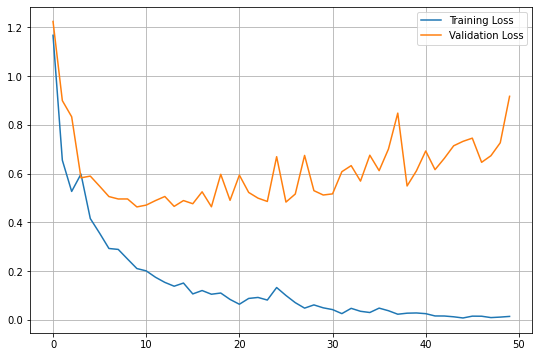

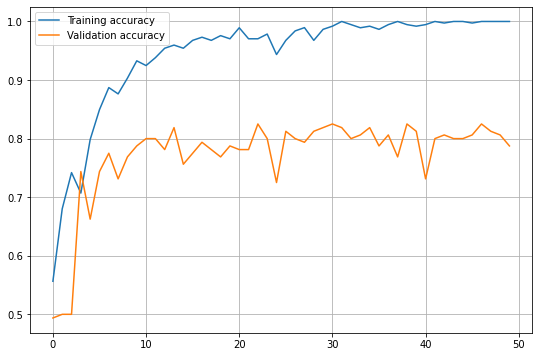

In [13]:
import matplotlib.pyplot as plt


plt.figure(figsize = (9, 6))
plt.plot( Hist.history['loss'])
plt.plot(Hist.history['val_loss'])

plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()


plt.figure(figsize = (9, 6))
plt.plot(Hist.history['accuracy'])
plt.plot( Hist.history['val_accuracy'])

plt.legend(['Training accuracy', 'Validation accuracy'])
plt.grid()
plt.show()